## Library Imports and Configs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sns.set_style("whitegrid")

In [ ]:
SEED = 42

## Dataset

Dictionary:

- Identifications

9. EmployeeCount – all values are 1 Source Content Column’s description
10. EmployeeNumber - employee ID

- Quantitative
1. Age – age of the employee
2. DailyRate – salary per workday
3. DistanceFromHome – the distance from work to home
4. HourlyRate – hourly salary
5. MonthlyIncome – monthly salary. how much the employee earn monthly.
6. MonthlyRate – monthly cost of an employee. The sum of salary, social insurance, administration, logistics, overhead etc.
7. NumcompaniesWorked – no. of companies worked at
8. PercentSalaryHike – percentage increase in salary
9. StandardHours – standard hours
10. TotalWorkingYears – total years worked
11. TrainingTimesLastYear – hours spent training
12. WorkLifeBalance – time spent between work and outside
13. YearsAtCompany – total number of years at the company
14. YearsInCurrentRole – years in current role
15. YearsSinceLastPromotion – last promotion
16. YearsWithCurrentManager – years spent with the current manager
17. EnvironmentSatisfaction – satisfaction with the work environment 1=Low, 2=Medium, 3=High, 4=Very High
18. JobInvolvement – the degree to which a person psychologically identifies with his or her job. 1=Low, 2=Medium, 3=High, 4=Very High
19. JobLevel – level of the job. 1=lowest.
20. JobSatisfaction – satisfaction with the job. 1=Low, 2=Medium, 3=High, 4=Very High
21. PerformanceRating – performance rating
22. RelationsSatisfaction – relations satisfaction
23. StockOptionsLevel – how many company stocks do you own (The higher the number, the more stock option employee has)

- Qualitative
1. Attrition – whether the employee left the company 0=no, 1=yes
2. BusinessTravel – businesses travel frequnecy
3. Department
4. Education – 1=Below College, 2=College, 3=Bachelor, 4=Master, 5=Doctor
5. EducationField – field of education or degree
7. Gender
8. JobRole
9. MaritalStatus – description of the employee's marital status
10. Over18 – 1=Yes, 2=No
11. Overtime – 1=No, 2=Yes


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Greystone CSVs/Subject_2-Employee attrition CSV.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Exploratory Analysis

### General Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

 - There is no missing values in the dataframe

In [ ]:
# Percent of Yes in the role dataset
round(df["Attrition"].value_counts(normalize=True)*100, 2)

,proportion
Attrition,
No,83.88
Yes,16.12


### Quantitative Analysis

#### Correlation Analysis

- StandardHours is constant, so is going to be dropped
- YearsWithCurrManager and JobLevel will be dropped
- YearsAtCompany and YearsInCurrentRole will be combined to Stagnation

<Axes: >

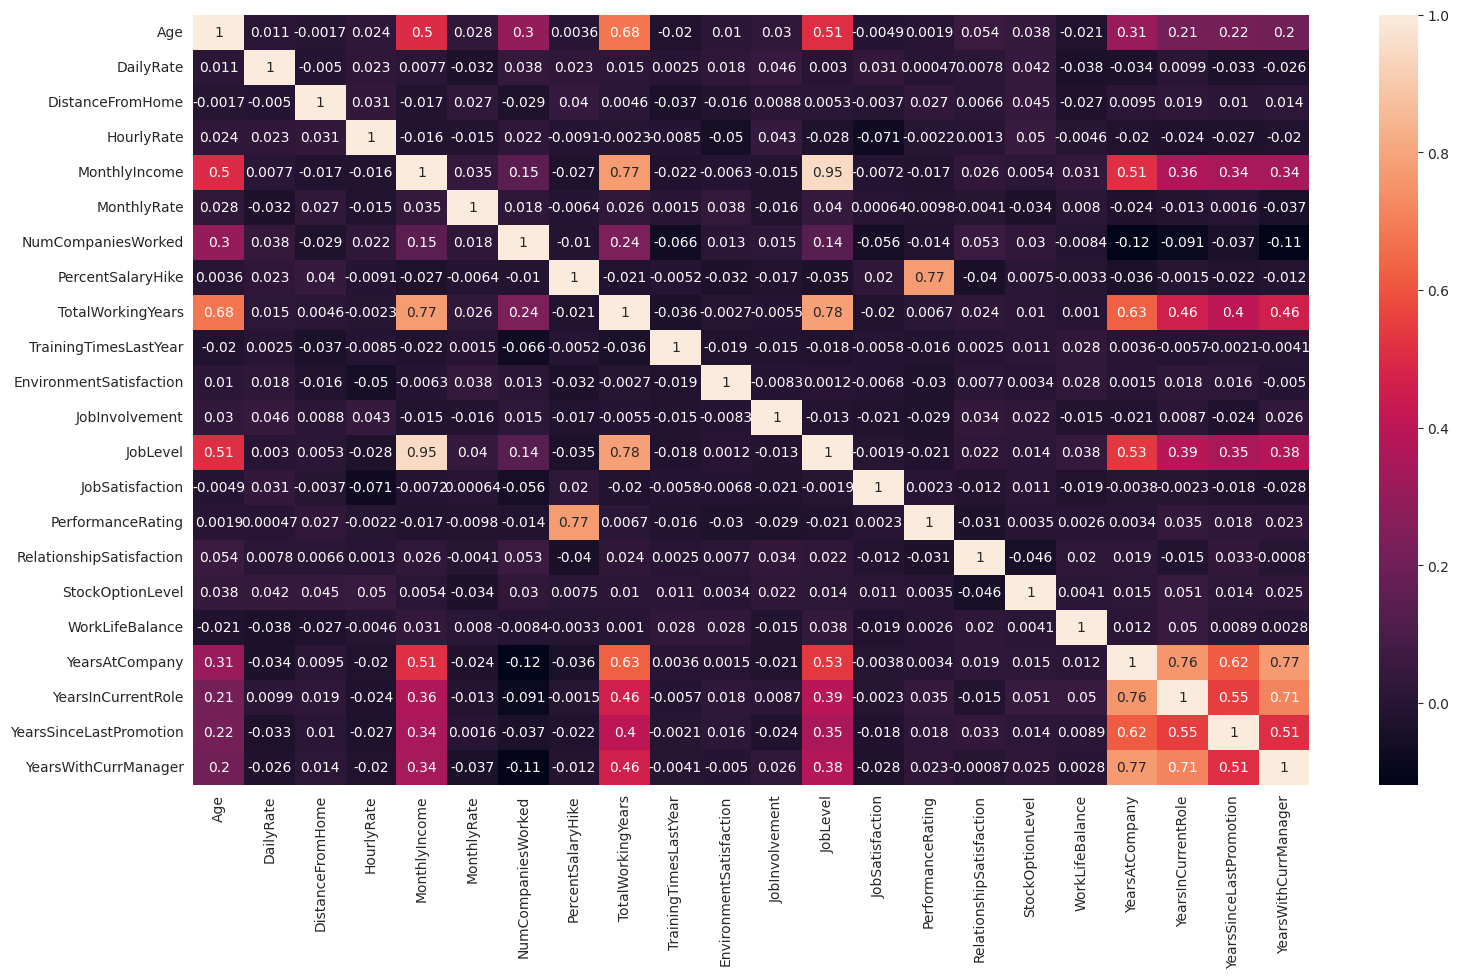

In [ ]:
quant_feat = ["Age",
              "DailyRate",
              "DistanceFromHome",
              "HourlyRate",
              "MonthlyIncome",
              "MonthlyRate",
              "NumCompaniesWorked",
              "PercentSalaryHike",
              "TotalWorkingYears",
              "TrainingTimesLastYear",
              "EnvironmentSatisfaction",
              "JobInvolvement",
              "JobLevel",
              "JobSatisfaction",
              "PerformanceRating",
              "RelationshipSatisfaction",
              "StockOptionLevel",
              "WorkLifeBalance",
              "YearsAtCompany",
              "YearsInCurrentRole",
              "YearsSinceLastPromotion",
              "YearsWithCurrManager"]

# Creating correlation matrix
corr_mtx = df[quant_feat].corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr_mtx, annot=True)



Using a threshold of 0.7 in order to simplify the model and obtain good results as well, some features are going to be analyzed in pairs.

- MonthlyIncome / TotalWorkingYears (0.77)
- MonthlyIncome / JobLevel (0.95)
- TotalWorkingYears / JobLevel (0.78)
- PercentSalaryHike / PerformingRate (0.77)
- YearsAtCompany / YearsInCurrentRole (0.76)
- YearsAtCompany / YearsWithCurrManager (0.77)
- YearsInCurrentRole / YearsWithCurrManager (0.77)

After further analysis YearsWithCurrManager, JobLevel will be dropped from de dataframe, and YearsAtCompany and YearsInCurrentRole will be combined to create the new feature called Stagnation

In [ ]:
# Creating Stagnation feature
def stagnation(YearsInCurrentRole, YearsAtCompany):
  if YearsAtCompany == 0:
    return 0
  else:
    return YearsInCurrentRole / YearsAtCompany*100
df["Stagnation"] = df[["YearsInCurrentRole","YearsAtCompany"]].apply(lambda x: stagnation(*x), axis=1)

In [ ]:
# Dropping StandardHours and YearsWithCurrManager
df.drop(columns=["JobLevel", "YearsWithCurrManager"], inplace=True)

#### Individual Analysis

In [ ]:
def quantitative_analysis(feature):
  plt.figure(figsize=(10,5)) # Creating the figure
  ax = sns.histplot(data=df[df["Attrition"] == "Yes"], x=feature, multiple="stack",kde=True)
  ax.set_title(f"{feature} Feature")

def boxplot(feature):
  plt.figure(figsize=(8,4)) # Creating the figure
  ax = sns.boxplot(data=df[df["Attrition"] == "Yes"], x=feature)
  ax.set_title(f"{feature} Boxplot")

# We are going to use Point-biserial correlation to analyze categorical against continuos features.
# Defining a function to estipulates statistical correlation between attrition and the quantitative features.
def attrition_corr(feature_series):
  le = preprocessing.LabelEncoder()
  encoded_attrition = pd.Series(le.fit_transform(df['Attrition']))
  return stats.pointbiserialr(encoded_attrition, feature_series) # Returns (correlation,p-value)

In [ ]:
corr_values = []
corr_index = []

##### Age (Clear)

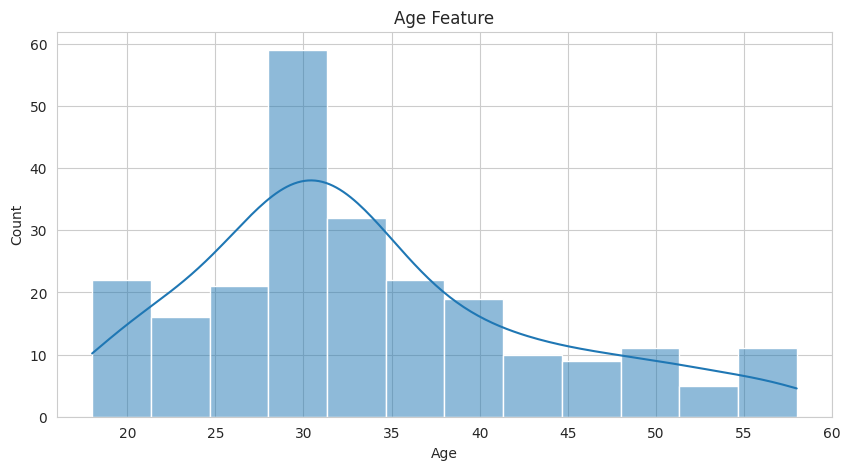

In [ ]:
#Age
quantitative_analysis("Age")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['Age'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

corr_values.append(result.correlation)
corr_index.append("num_Age")

Correlation = -0.15920500686577957
P-value = 8.35630802110312e-10


Number of outliers = 33


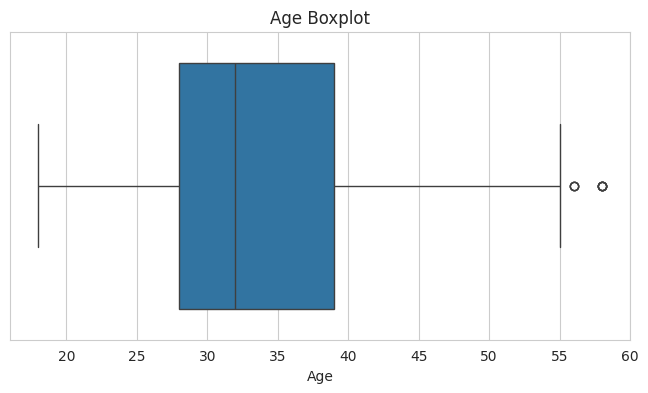

In [ ]:
#Age Boxplot
boxplot("Age")

outliers = df[df["Age"] > (df["Age"].quantile(.75)-df["Age"].quantile(.25))+df["Age"].quantile(.75)]["Age"]
print(f"Number of outliers = {outliers.shape[0]}")

##### DailyRate (Correlation = -0.056)

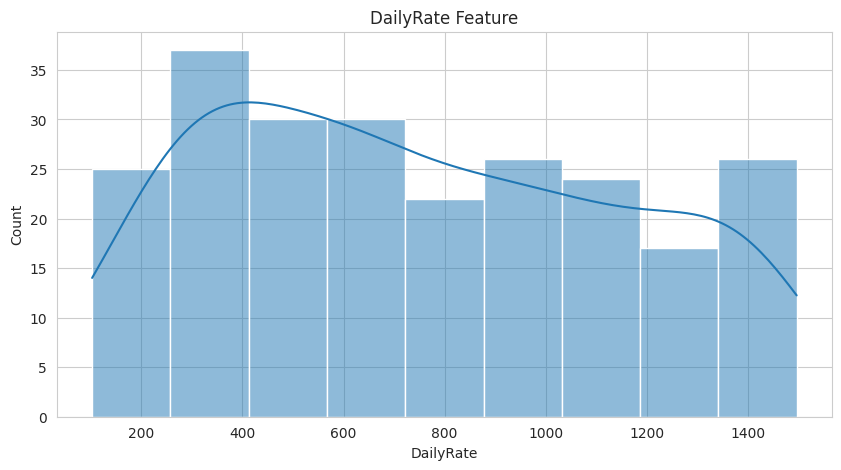

In [ ]:
#DailyRate
quantitative_analysis("DailyRate")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['DailyRate'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

corr_values.append(result.correlation)
corr_index.append("num_DailyRate_nt")

Correlation = -0.05665199186762928
P-value = 0.029858160660264706


##### DistanceFromHome (Correlation = 0.078)

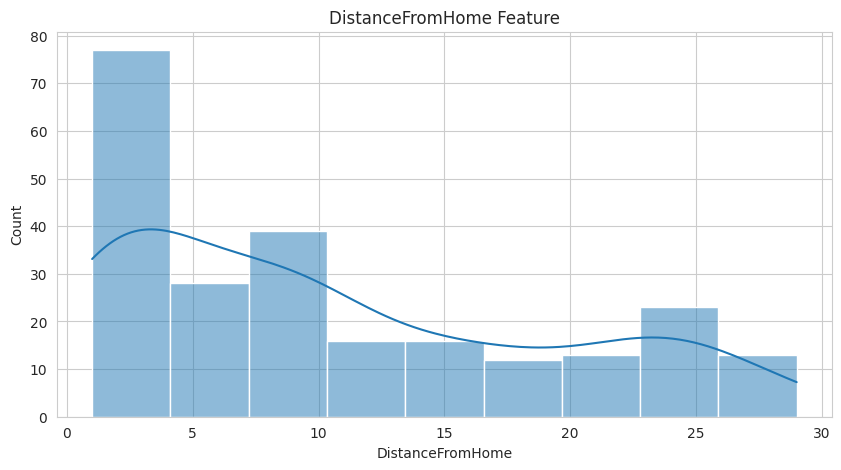

In [ ]:
#DistanceFromHome
quantitative_analysis("DistanceFromHome")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['DistanceFromHome'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

corr_values.append(result.correlation)
corr_index.append("num_DistanceFromHome")

Correlation = 0.07792358295570374
P-value = 0.002793060080213459


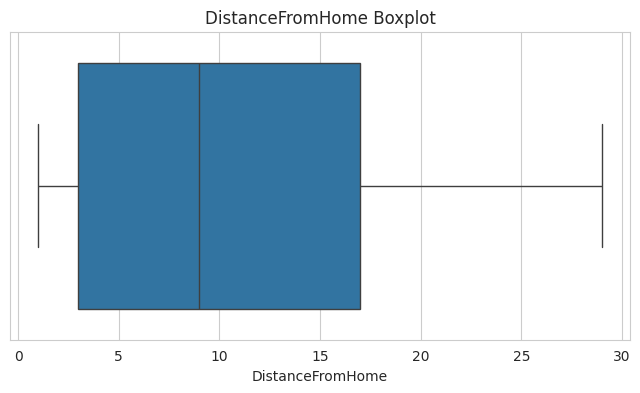

In [ ]:
# DistanceFromHome Boxplot
boxplot("DistanceFromHome")

##### HourlyRate (Not sure)

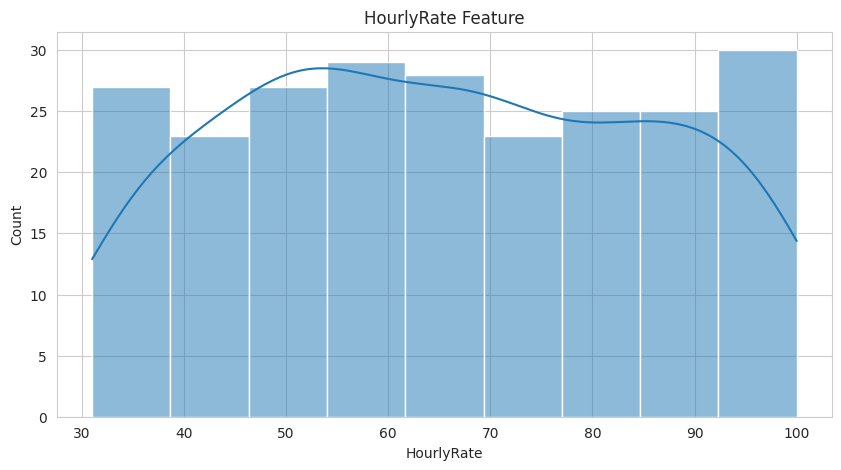

In [ ]:
#HourlyRate
quantitative_analysis("HourlyRate")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['HourlyRate'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

Correlation = -0.006845549572139846
P-value = 0.7931347689944281


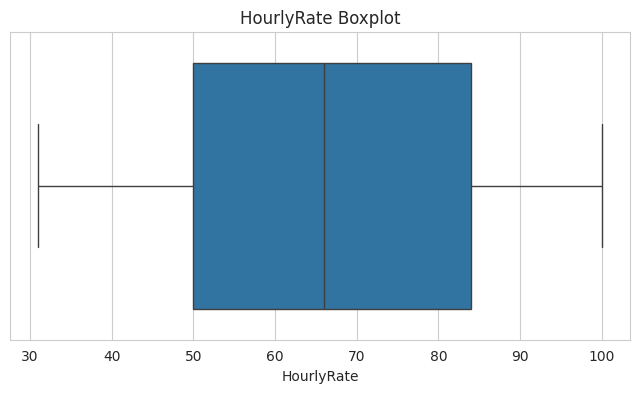

In [ ]:
boxplot("HourlyRate")

##### EnvironmentSatisfaction (Clear)

Text(0.5, 1.0, 'EnvironmentSatisfaction Feature')

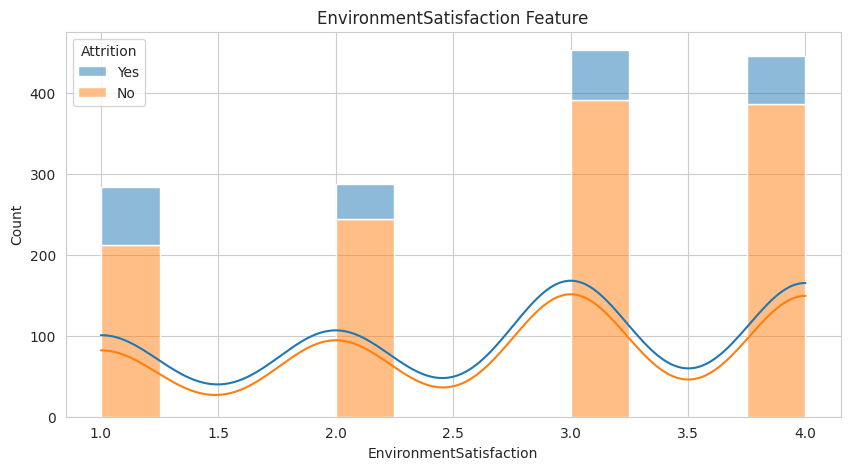

In [ ]:
#EnvironmentSatisfaction
plt.figure(figsize=(10,5)) # Creating the figure
ax = sns.histplot(data=df, x="EnvironmentSatisfaction",hue = "Attrition", multiple="stack",kde=True)
ax.set_title(f"EnvironmentSatisfaction Feature")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['EnvironmentSatisfaction'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

corr_values.append(result.correlation)
corr_index.append("num_EnvironmentSatisfaction")

Correlation = -0.10336897833793601
P-value = 7.172338549368838e-05


##### JobInvolvement (Clear)

Text(0.5, 1.0, 'JobInvolvement Feature')

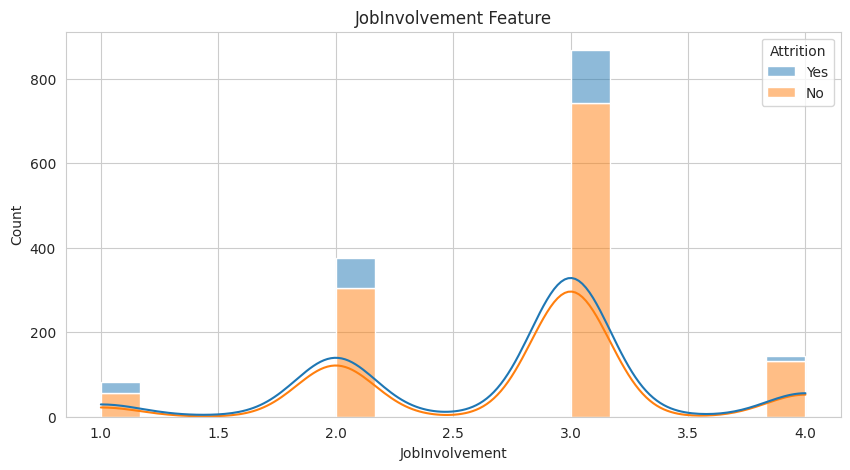

In [ ]:
#JobInvolvement
plt.figure(figsize=(10,5)) # Creating the figure
ax = sns.histplot(data=df, x="JobInvolvement",hue = "Attrition", multiple="stack",kde=True)
ax.set_title(f"JobInvolvement Feature")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['JobInvolvement'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

corr_values.append(result.correlation)
corr_index.append("num_JobInvolvement")

Correlation = -0.13001595678605338
P-value = 5.677065356745746e-07


##### JobSatisfaction (Clear)

Text(0.5, 1.0, 'JobSatisfaction Feature')

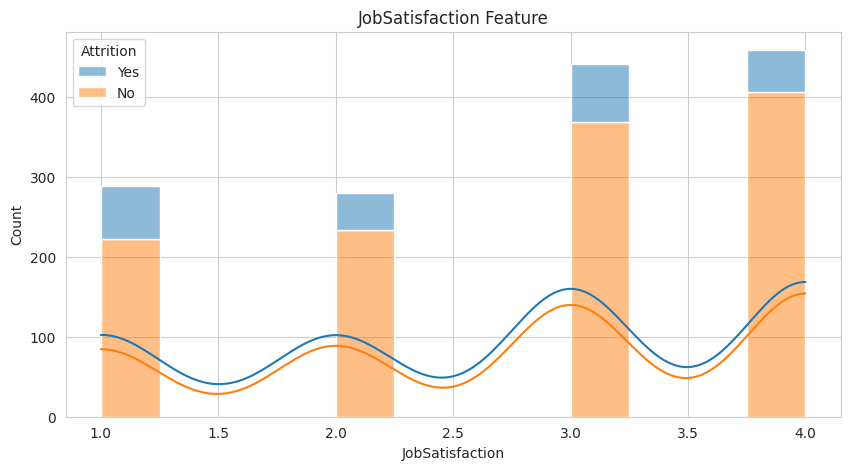

In [ ]:
# JobSatisfaction
plt.figure(figsize=(10,5)) # Creating the figure
ax = sns.histplot(data=df, x="JobSatisfaction",hue = "Attrition", multiple="stack",kde=True)
ax.set_title(f"JobSatisfaction Feature")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['JobSatisfaction'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

corr_values.append(result.correlation)
corr_index.append("num_JobSatisfaction")

Correlation = -0.1034811260690214
P-value = 7.043066741731186e-05


###### PerformanceRating (Dropped)

In [ ]:
round(df.groupby("PerformanceRating")["Attrition"].value_counts(normalize=True).unstack()*100,2)

Attrition,No,Yes
PerformanceRating,,
3,83.92,16.08
4,83.63,16.37


##### PerformanceRating (Dropped)

Text(0.5, 1.0, 'PerformanceRating Feature')

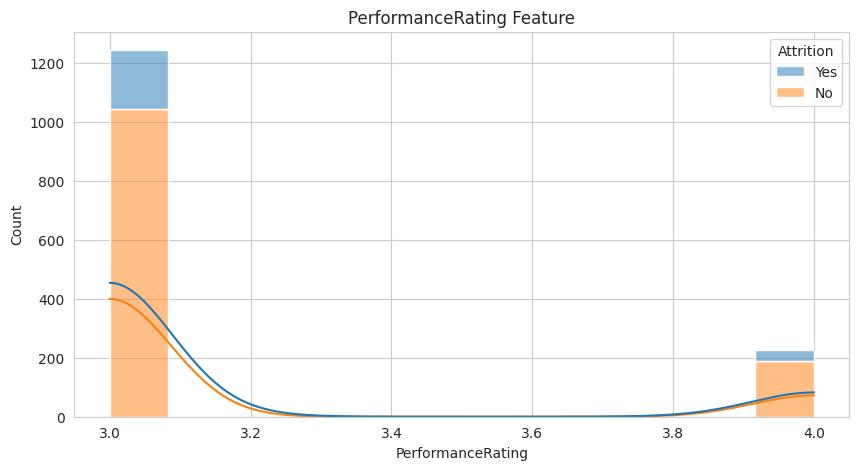

In [ ]:
# PerformanceRating
plt.figure(figsize=(10,5)) # Creating the figure
ax = sns.histplot(data=df, x="PerformanceRating",hue = "Attrition", multiple="stack",kde=True)
ax.set_title(f"PerformanceRating Feature")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['PerformanceRating'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

Correlation = 0.0028887517110808307
P-value = 0.9118840421068957


##### RelationshipSatisfaction (Correlation = -0.045)

Text(0.5, 1.0, 'RelationshipSatisfaction Feature')

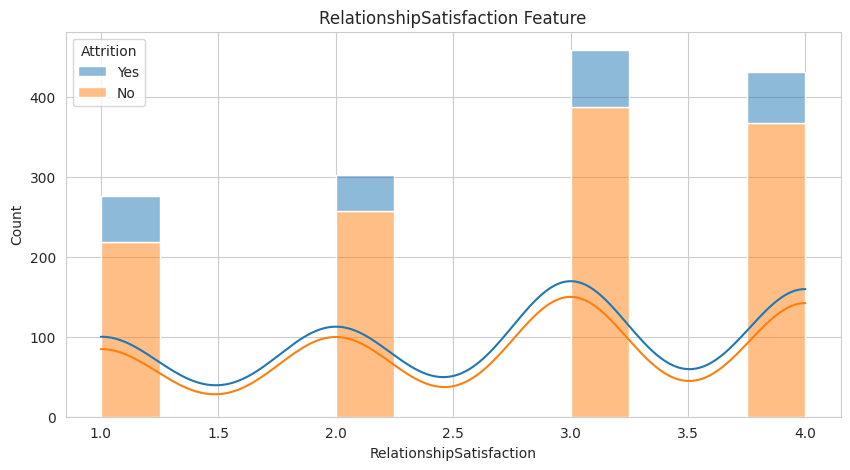

In [ ]:
# RelationsSatisfaction
plt.figure(figsize=(10,5)) # Creating the figure
ax = sns.histplot(data=df, x="RelationshipSatisfaction",hue = "Attrition", multiple="stack",kde=True)
ax.set_title(f"RelationshipSatisfaction Feature")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['RelationshipSatisfaction'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

corr_values.append(result.correlation)
corr_index.append("num_RelationshipSatisfaction_nt")

Correlation = -0.045872278881126695
P-value = 0.07871363048465883


##### StockOptionsLevel (Clear)

Text(0.5, 1.0, 'StockOptionsLevel Feature')

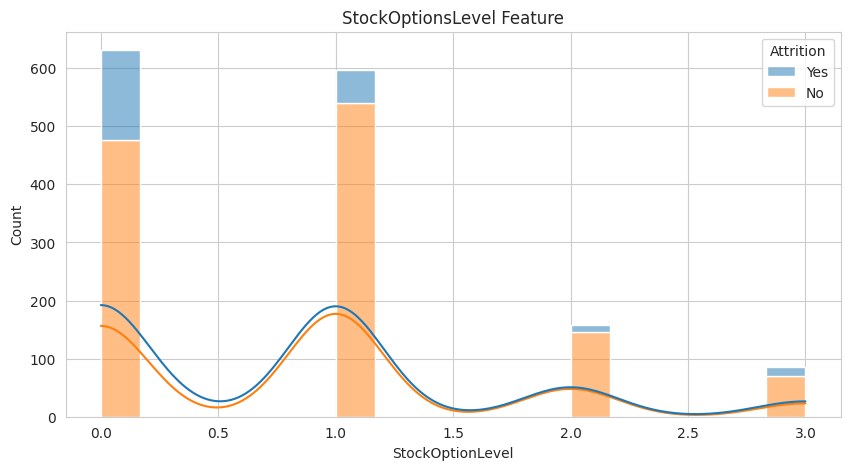

In [ ]:
# StockOptionsLevel
plt.figure(figsize=(10,5)) # Creating the figure
ax = sns.histplot(data=df, x="StockOptionLevel",hue = "Attrition", multiple="stack",kde=True)
ax.set_title(f"StockOptionsLevel Feature")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['StockOptionLevel'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

corr_values.append(result.correlation)
corr_index.append("num_StockOptionLevel")

Correlation = -0.13714491893332553
P-value = 1.3010149660020102e-07


##### MonthlyIncome (Clear)
Maybe remove outliers

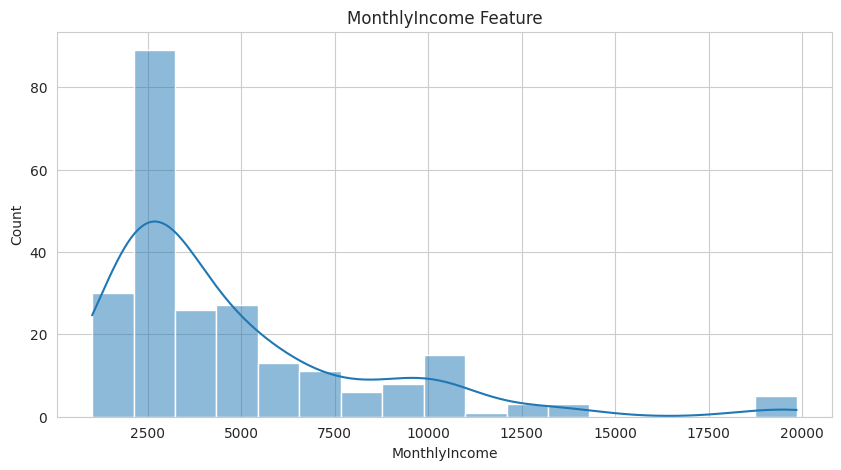

In [ ]:
#MonthlyIncome
quantitative_analysis("MonthlyIncome")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['MonthlyIncome'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

corr_values.append(result.correlation)
corr_index.append("num_MonthlyIncome")

Correlation = -0.15983958238498874
P-value = 7.147363985353831e-10


Number of outliers = 146
Percent of outliers = 9.93%


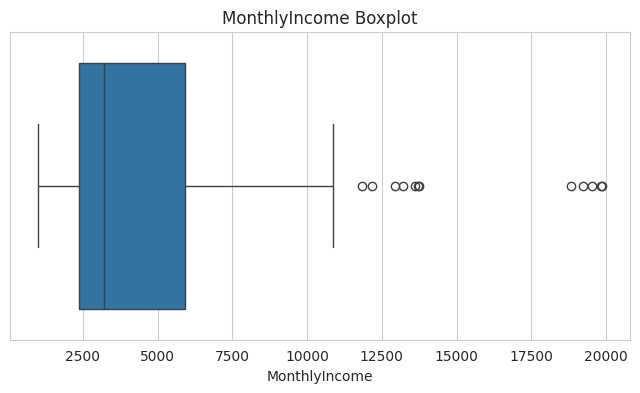

In [ ]:
#MonthlyIncome Boxplot
boxplot("MonthlyIncome")

outliers = df[df["MonthlyIncome"] > (df["MonthlyIncome"].quantile(.75)-df["MonthlyIncome"].quantile(.25))+df["MonthlyIncome"].quantile(.75)]["MonthlyIncome"]
print(f"Number of outliers = {outliers.shape[0]}")
print(f"Percent of outliers = {round(outliers.shape[0]/df.shape[0]*100,2)}%")

##### MonthlyRate (Not sure)

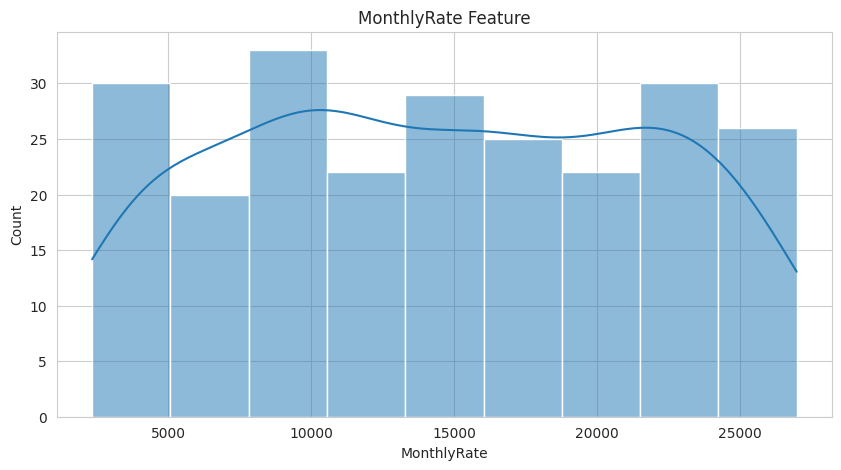

In [ ]:
#MonthlyRate
quantitative_analysis("MonthlyRate")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['MonthlyRate'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

Correlation = 0.015170212530471464
P-value = 0.5611235982242991


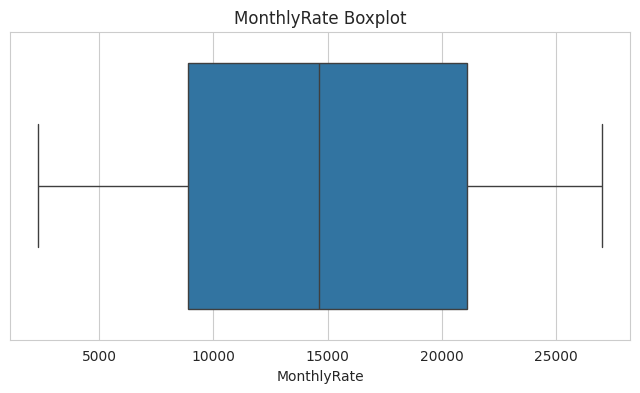

In [ ]:
# MonthlyRate Boxplot
boxplot("MonthlyRate")

##### NumCompaniesWorked (Correlation = 0.043)

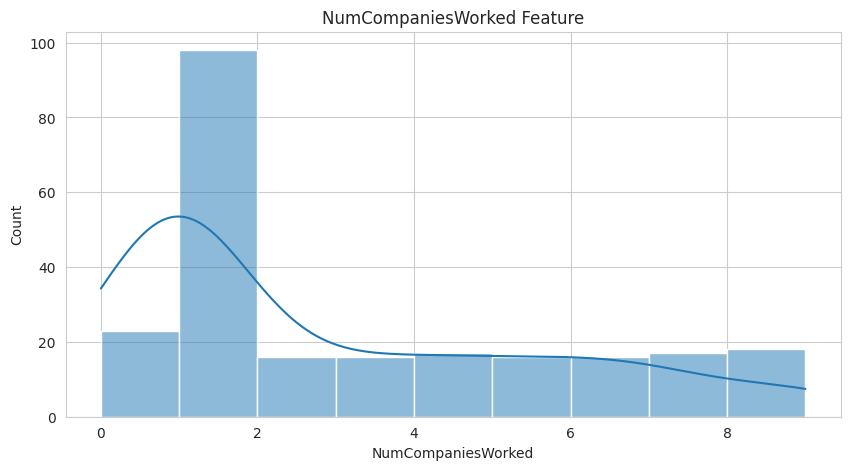

In [ ]:
#NumCompaniesWorked
quantitative_analysis("NumCompaniesWorked")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['NumCompaniesWorked'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

corr_values.append(result.correlation)
corr_index.append("num_NumCompaniesWorked_nt")

Correlation = 0.043493739057813625
P-value = 0.09552526205651818


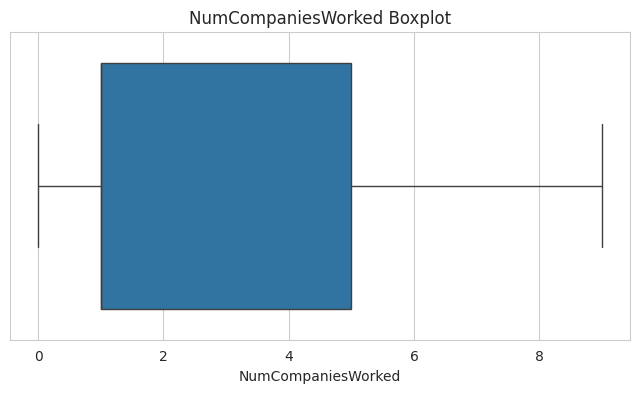

In [ ]:
#MonthlyIncome Boxplot
boxplot("NumCompaniesWorked")



#####PercentSalaryHike (Not Sure)

Probably cut into groups

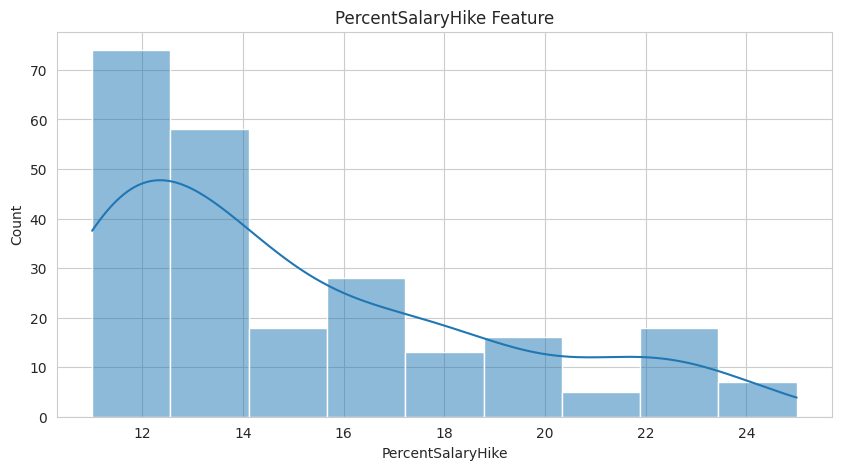

In [ ]:
#PercentSalaryHike
quantitative_analysis("PercentSalaryHike")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['PercentSalaryHike'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

Correlation = -0.013478202057439092
P-value = 0.605612823889376


##### TotalWorkingYears (Clear)
Maybe remove the outliers

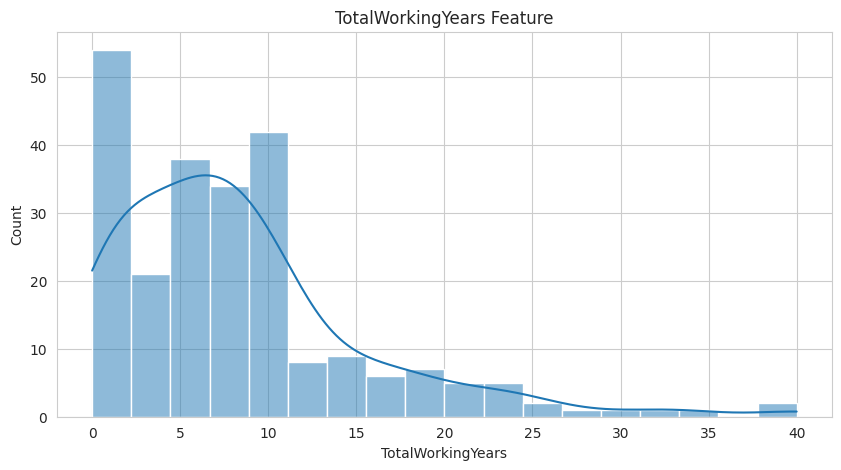

In [ ]:
#TotalWorkingYears
quantitative_analysis("TotalWorkingYears")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['TotalWorkingYears'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

corr_values.append(result.correlation)
corr_index.append("num_TotalWorkingYears")

Correlation = -0.17106324613622645
P-value = 4.0618781112668525e-11


Number of outliers = 112
Percent of outliers = 7.62%


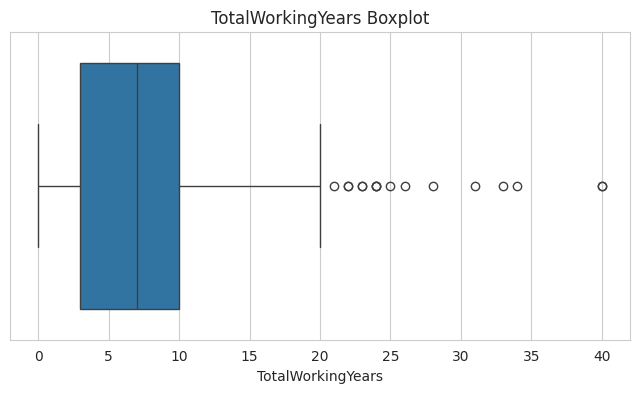

In [ ]:
# TotalWorkingYears Boxplot
boxplot("TotalWorkingYears")

outliers = df[df["TotalWorkingYears"] > (df["TotalWorkingYears"].quantile(.75)-df["TotalWorkingYears"].quantile(.25))+df["TotalWorkingYears"].quantile(.75)]["TotalWorkingYears"]
print(f"Number of outliers = {outliers.shape[0]}")
print(f"Percent of outliers = {round(outliers.shape[0]/df.shape[0]*100,2)}%")

#####TrainingTimesLastYear (Correlation = -0.059)

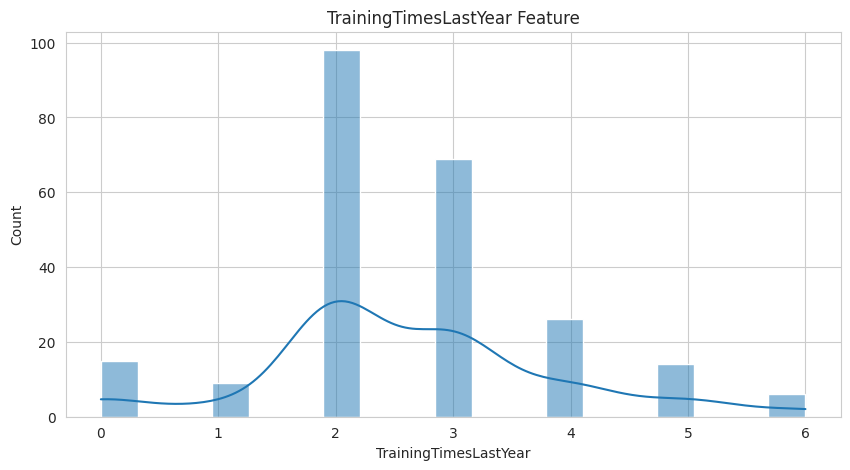

In [ ]:
#TrainingTimesLastYear
quantitative_analysis("TrainingTimesLastYear")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['TrainingTimesLastYear'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

corr_values.append(result.correlation)
corr_index.append("num_TrainingTimesLastYear_nt")

Correlation = -0.05947779855642055
P-value = 0.022578499737201514


#####WorkLifeBalance (Correlation = -0.063)

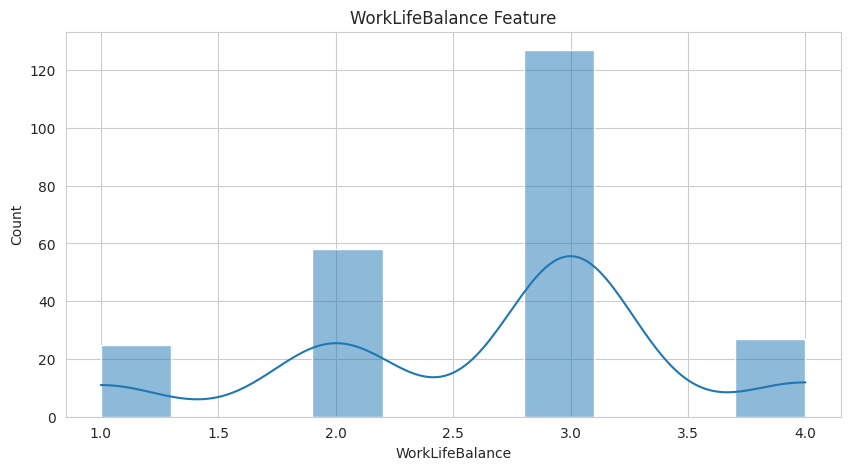

In [ ]:
#WorkLifeBalance
quantitative_analysis("WorkLifeBalance")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['WorkLifeBalance'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

corr_values.append(result.correlation)
corr_index.append("num_WorkLifeBalance_nt")

Correlation = -0.06393904721740903
P-value = 0.014211054989021338


#####YearsAtCompany (Sub by Stagnation)

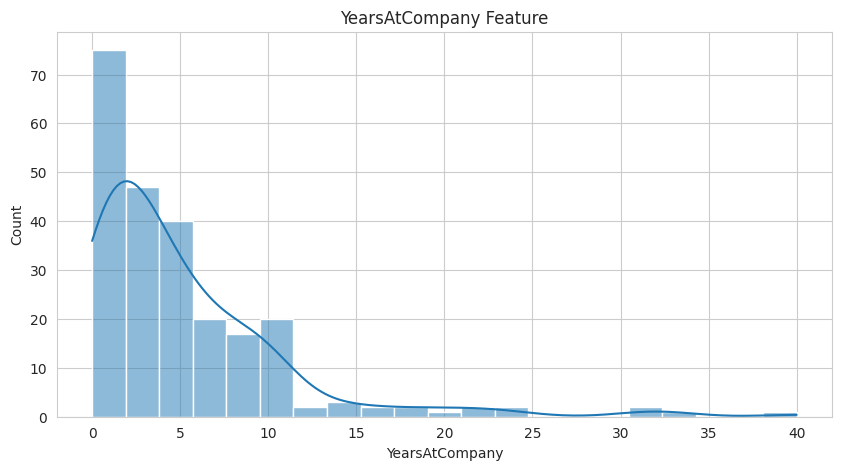

In [ ]:
#YearsAtCompany
quantitative_analysis("YearsAtCompany")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['YearsAtCompany'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

Correlation = -0.13439221398997728
P-value = 2.3188716103861509e-07


#####YearsInCurrentRole (Sub by Stagnation)

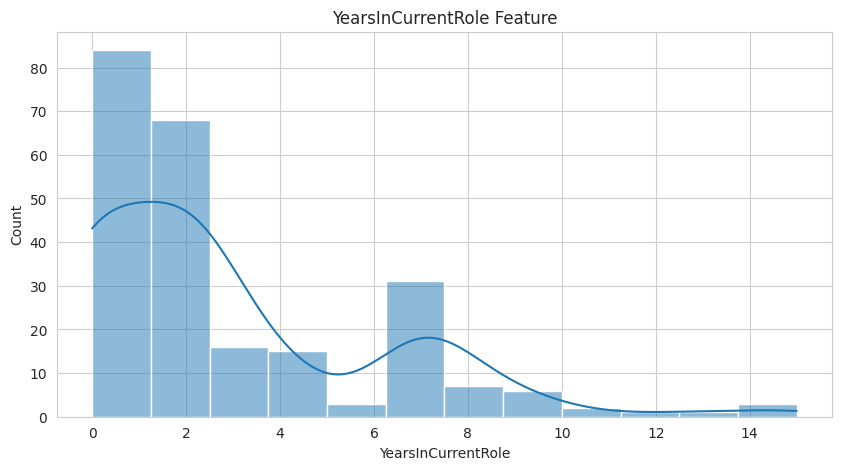

In [ ]:
#YearsInCurrentRole
quantitative_analysis("YearsInCurrentRole")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['YearsInCurrentRole'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

Correlation = -0.16054500426770119
P-value = 6.003185843640992e-10


#####Stagnation (Clear)

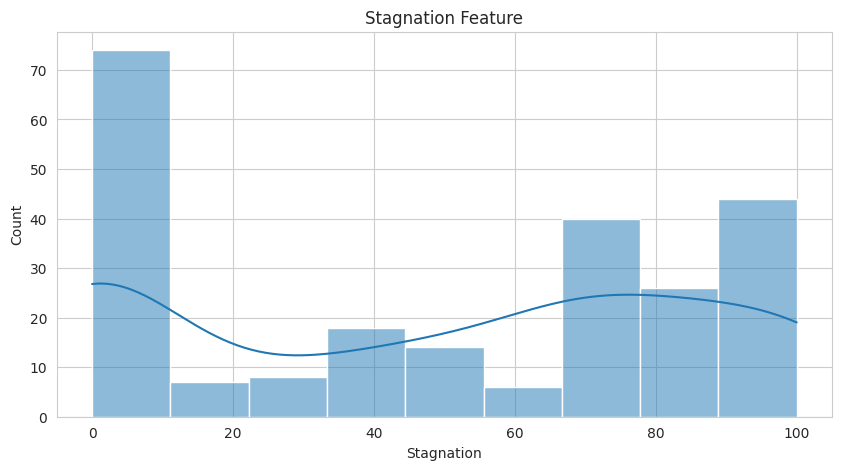

In [ ]:
quantitative_analysis("Stagnation")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['Stagnation'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

corr_values.append(result.correlation)
corr_index.append("num_Stagnation")

Correlation = -0.13032402719173336
P-value = 5.335297670708718e-07


#####YearsSinceLastPromotion (Not sure)
Maybe if we remove the outliers

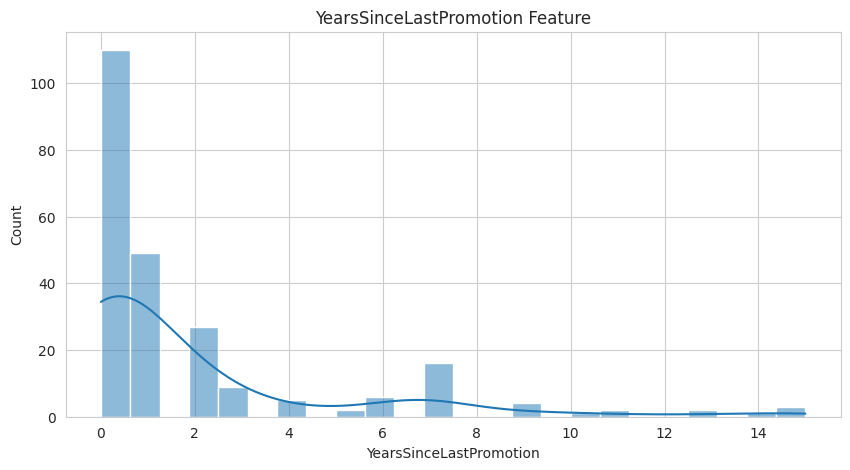

In [ ]:
#YearsSinceLastPromotion
quantitative_analysis("YearsSinceLastPromotion")

In [ ]:
# Correlation Analysis
result = attrition_corr(df['YearsSinceLastPromotion'])
print(f"Correlation = {result.correlation}")
print(f"P-value = {result.pvalue}")

Correlation = -0.03301877514258439
P-value = 0.20578995916249357


Number of outliers = 183
Percent of outliers = 12.45%


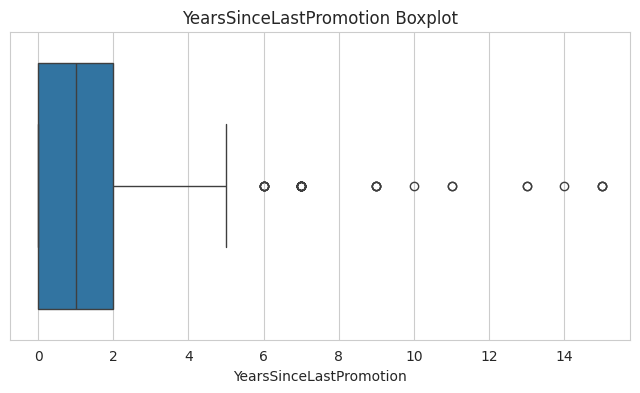

In [ ]:
# YearsSinceLastPromotion Boxplot
boxplot("YearsSinceLastPromotion")

outliers = df[df["YearsSinceLastPromotion"] > (df["YearsSinceLastPromotion"].quantile(.75)-df["YearsSinceLastPromotion"].quantile(.25))+df["YearsSinceLastPromotion"].quantile(.75)]["YearsSinceLastPromotion"]
print(f"Number of outliers = {outliers.shape[0]}")
print(f"Percent of outliers = {round(outliers.shape[0]/df.shape[0]*100,2)}%")

### Qualitative Analysis

In [ ]:
# Defining Cramer's Correlation to help look through the relashionship between two variables.
def cramerV(label,x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            warnings.warn(
            "Unable to calculate Cramer's V using bias correction. Consider not using bias correction",RuntimeWarning)
            v = 0
            print("If condition Met: ",v)
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
            print("Else condition Met: ",v)
    except:
        print("inside error")
        v = 0
    return v

def qualitative_analysis(feature):
  # Creating Sex distribution chart for each survival case
  display(round(df.groupby(feature)["Attrition"].value_counts(normalize=True).unstack()*100,2))
  plt.figure(figsize=(15,6))
  ax = sns.countplot(data=df, x=feature, hue="Attrition",stat='count')
  ax.set_title(f"{feature} Distribution")

#### Individual Analysis

##### BusinessTravel (Correlation = 0.12)

Attrition,No,Yes
BusinessTravel,,
Non-Travel,92.00,8.00
Travel_Frequently,75.09,24.91
Travel_Rarely,85.04,14.96


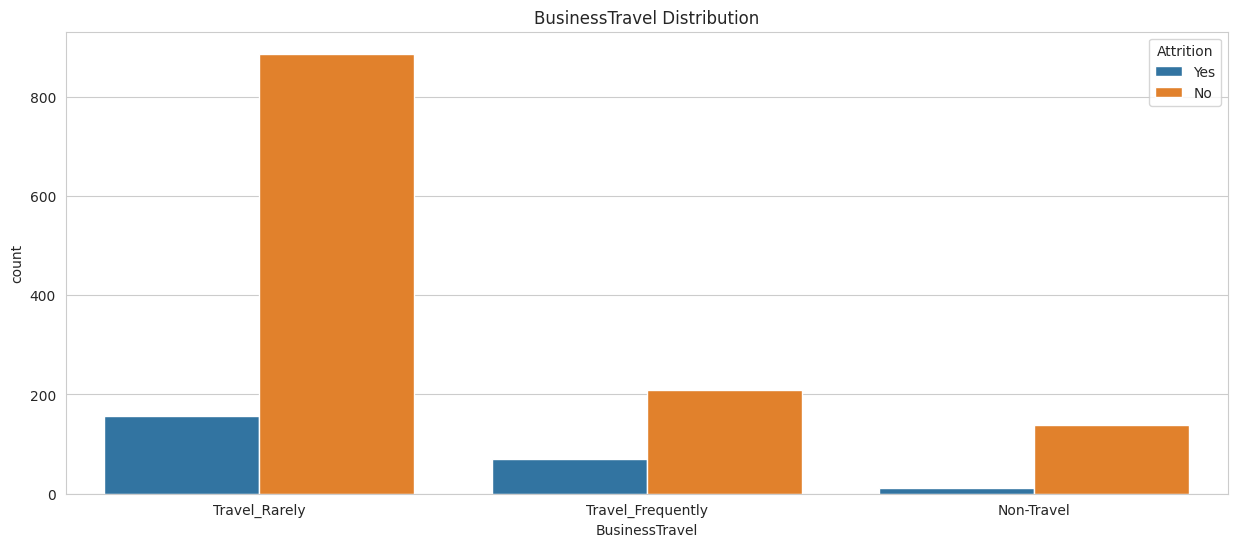

In [ ]:
# BusinessTravel
qualitative_analysis("BusinessTravel")

In [ ]:
# Correlation Analysis
result = cramerV(df["Attrition"], df["BusinessTravel"])

corr_values.append(result)
corr_index.append("cat_BusinessTravel")

Else condition Met:  0.12287973746788898


##### Department (Correlation = 0.077)

Attrition,No,Yes
Department,,
Human Resources,80.95,19.05
Research & Development,86.16,13.84
Sales,79.37,20.63


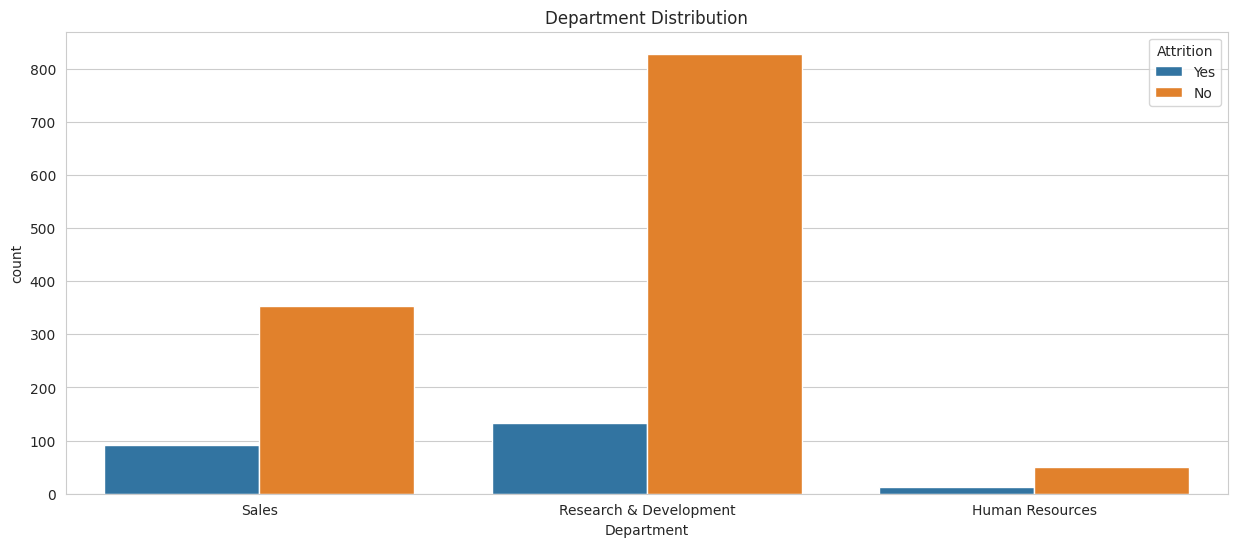

In [ ]:
# Department
qualitative_analysis("Department")

In [ ]:
# Correlation Analysis
result = cramerV(df["Attrition"], df["Department"])

corr_values.append(result)
corr_index.append("cat_Department")

Else condition Met:  0.07737459353444216


##### Education (Correlation = 0.00)

Attrition,No,Yes
Education,,
1,81.76,18.24
2,84.40,15.60
3,82.69,17.31
4,85.43,14.57
5,89.58,10.42


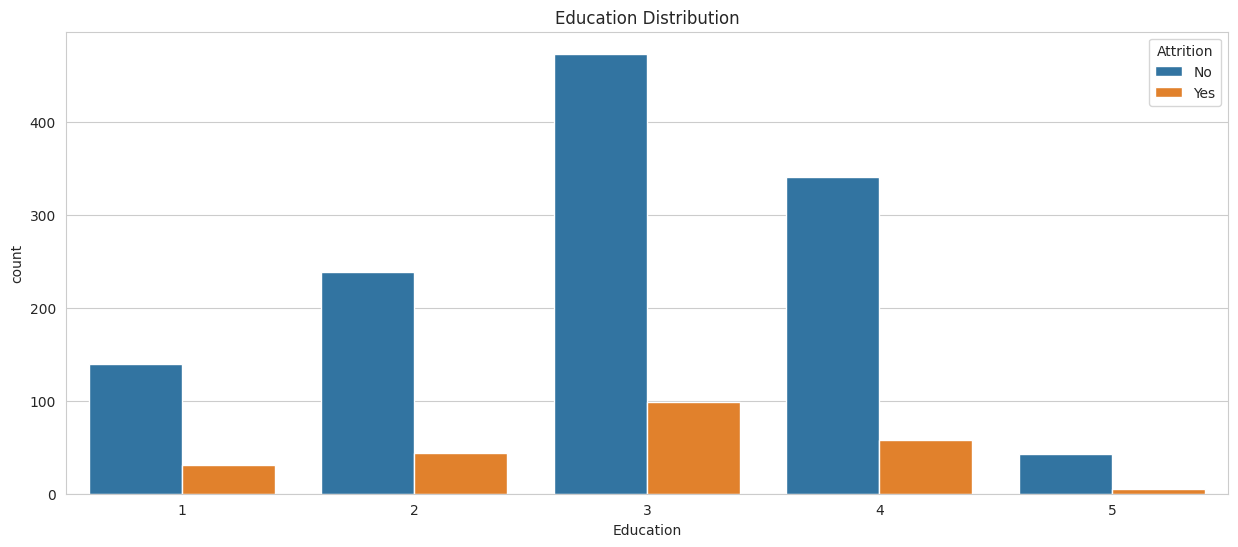

In [ ]:
# Education
qualitative_analysis("Education")

In [ ]:
# Correlation Analysis
result = cramerV(df["Attrition"], df["Education"])

corr_values.append(result)
corr_index.append("cat_Education")

Else condition Met:  0.0


##### EducationField (Correlation = 0.086)

Attrition,No,Yes
EducationField,,
Human Resources,74.07,25.93
Life Sciences,85.31,14.69
Marketing,77.99,22.01
Medical,86.42,13.58
Other,86.59,13.41
Technical Degree,75.76,24.24


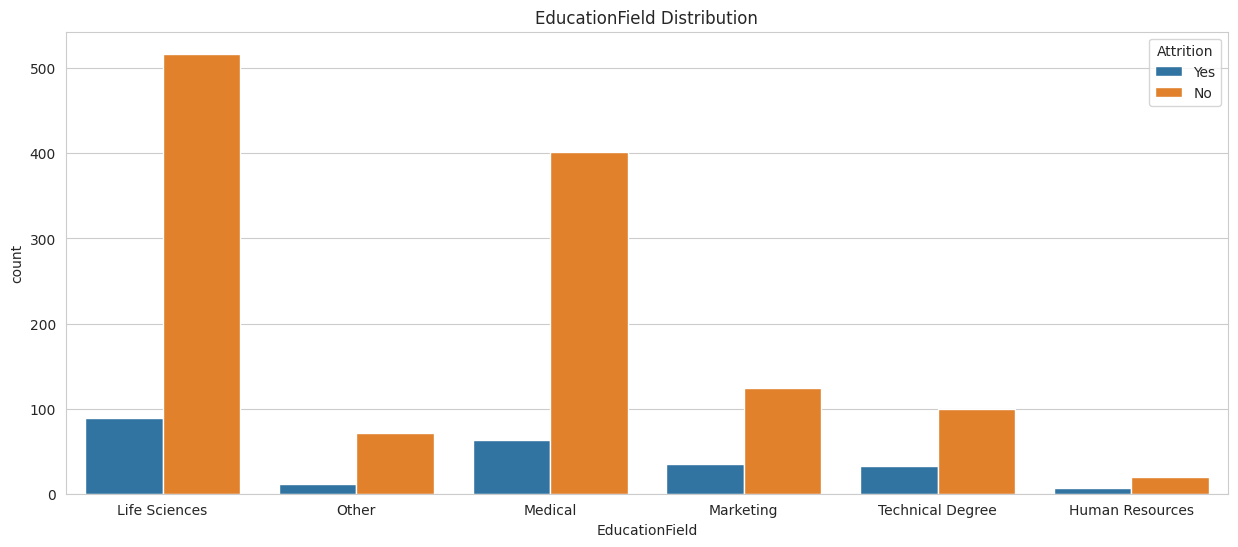

In [ ]:
# EducationField
qualitative_analysis("EducationField")

In [ ]:
# Correlation Analysis
result = cramerV(df["Attrition"], df["EducationField"])

corr_values.append(result)
corr_index.append("cat_EducationField")

Else condition Met:  0.08661737787742166


##### Gender (Correlation = 0.009)

Attrition,No,Yes
Gender,,
Female,85.20,14.80
Male,82.99,17.01


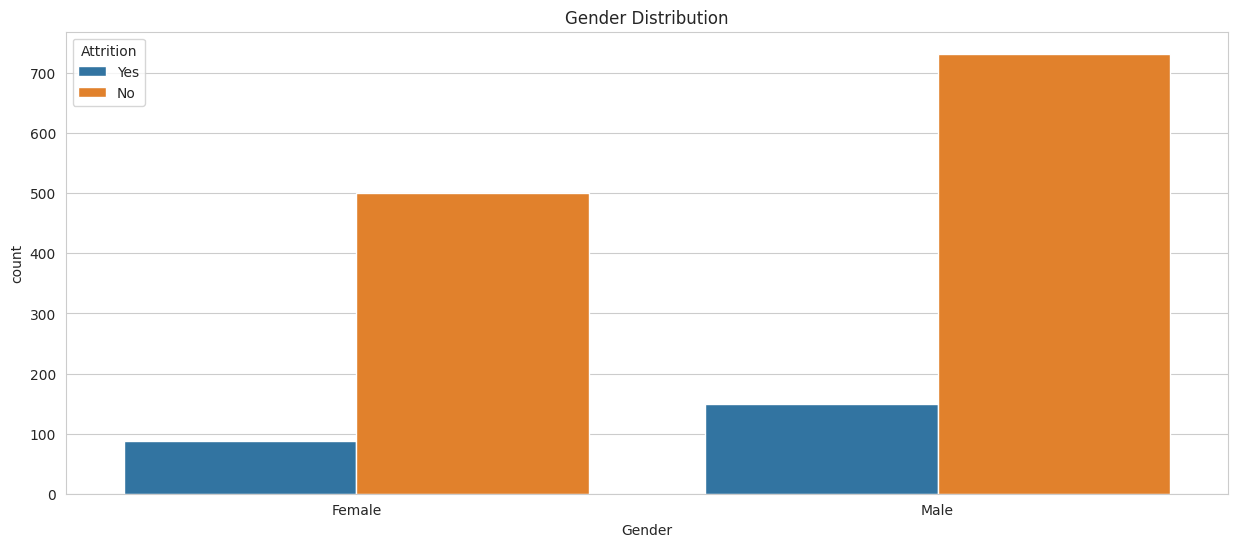

In [ ]:
# Gender
qualitative_analysis("Gender")

In [ ]:
# Correlation Analysis
result = cramerV(df["Attrition"], df["Gender"])

corr_values.append(result)
corr_index.append("cat_Gender")

Else condition Met:  0.008897205980620429


##### JobRole (Correlation = 0.23)

Attrition,No,Yes
JobRole,,
Healthcare Representative,93.13,6.87
Human Resources,76.92,23.08
Laboratory Technician,76.06,23.94
Manager,95.10,4.90
Manufacturing Director,93.10,6.90
Research Director,97.50,2.50
Research Scientist,83.90,16.10
Sales Executive,82.52,17.48
Sales Representative,60.24,39.76


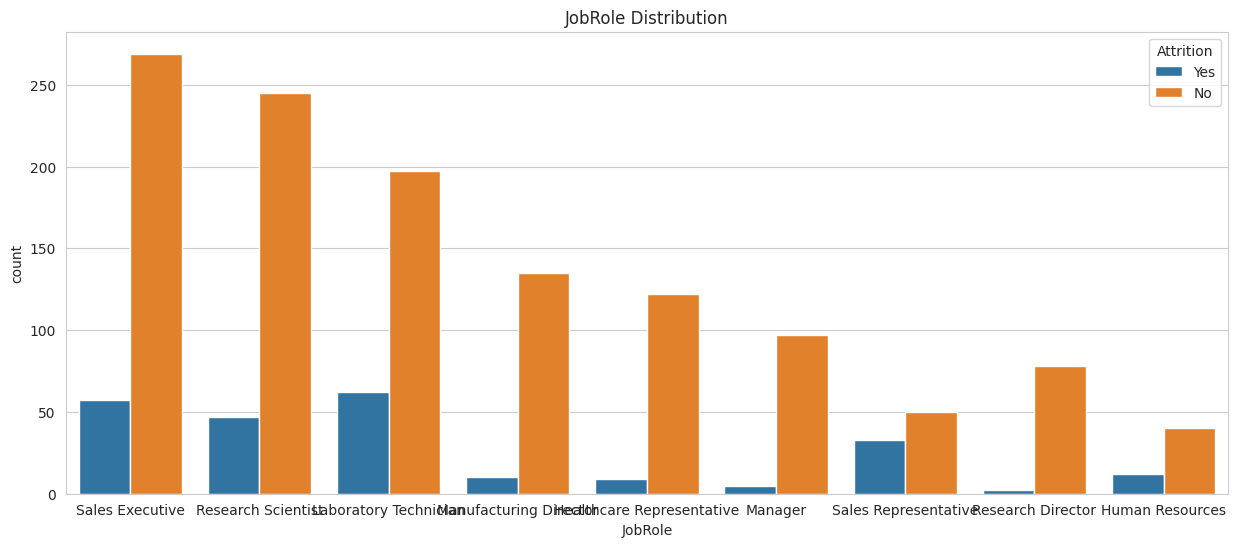

In [ ]:
# JobRole
qualitative_analysis("JobRole")

In [ ]:
# Correlation Analysis
result = cramerV(df["Attrition"], df["JobRole"])

corr_values.append(result)
corr_index.append("cat_JobRole")

Else condition Met:  0.2307014845350407


##### MaritalStatus (Correlation = 0.173)

Attrition,No,Yes
MaritalStatus,,
Divorced,89.91,10.09
Married,87.52,12.48
Single,74.47,25.53


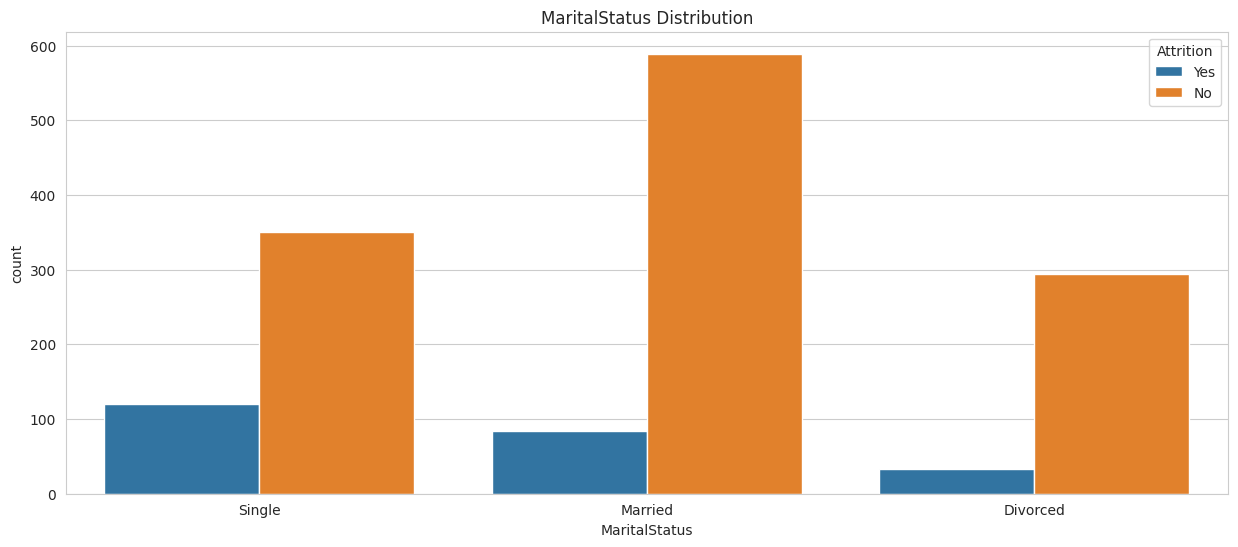

In [ ]:
# MaritalStatus
qualitative_analysis("MaritalStatus")

In [ ]:
# Correlation Analysis
result = cramerV(df["Attrition"], df["MaritalStatus"])

corr_values.append(result)
corr_index.append("cat_MaritalStatus")

Else condition Met:  0.17338643559557856


##### Over18 (Dropped)

The values are constant for all employees

Attrition,No,Yes
Over18,,
Y,83.88,16.12


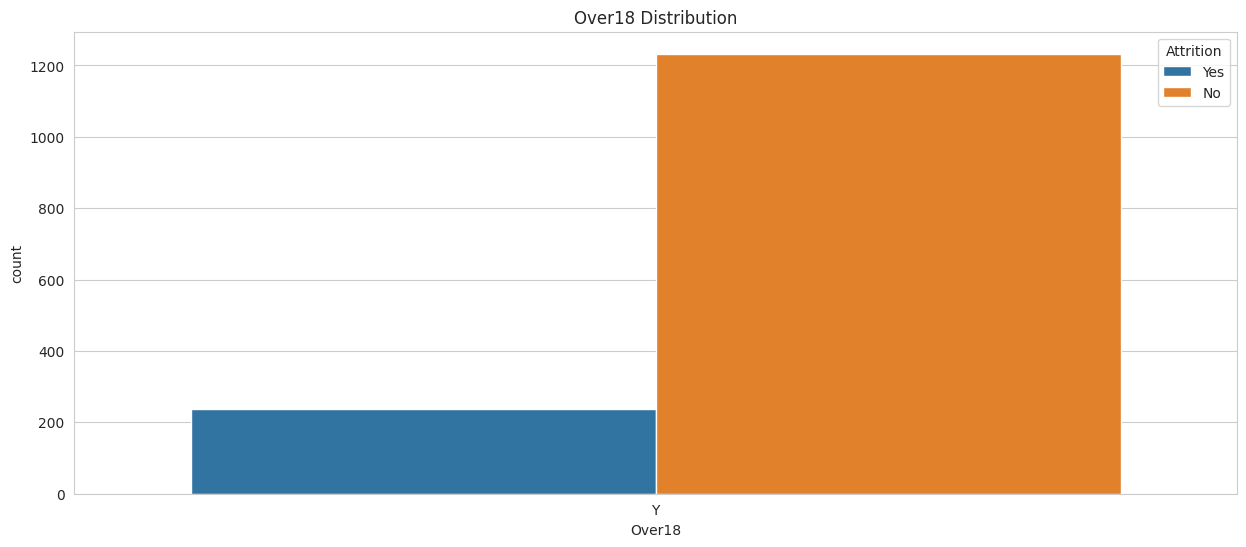

In [ ]:
# Over18
qualitative_analysis("Over18")

In [ ]:
# Correlation Analysis
result = cramerV(df["Attrition"], df["Over18"])

inside error


##### Overtime (Correlation = 0.242)

Attrition,No,Yes
OverTime,,
No,89.56,10.44
Yes,69.47,30.53


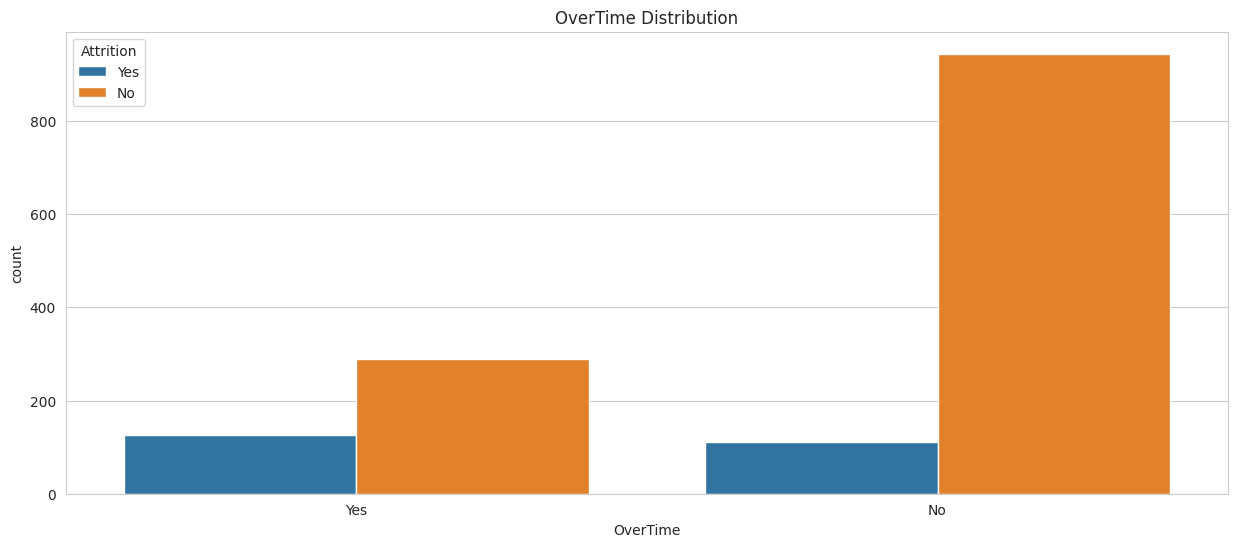

In [ ]:
# OverTime
qualitative_analysis("OverTime")

In [ ]:
# Correlation Analysis
result = cramerV(df["Attrition"], df["OverTime"])

corr_values.append(result)
corr_index.append("cat_OverTime")

Else condition Met:  0.24274868721401766


## Pre-processing

Dropping columns that are not significant for the model

In [ ]:
df.drop(["Over18","EmployeeCount","EmployeeNumber","StandardHours", "PerformanceRating"],axis=1,inplace=True)

Selecting features

In [ ]:
# Features Grouped by Exploratory Analysis
quant_clear_features = ["Age",
                      "DailyRate",
                      "DistanceFromHome",
                      "MonthlyIncome",
                      "NumCompaniesWorked",
                      "TotalWorkingYears",
                      "TrainingTimesLastYear",
                      "EnvironmentSatisfaction",
                      "JobInvolvement",
                      "JobSatisfaction",
                      "RelationshipSatisfaction",
                      "StockOptionLevel",
                      "WorkLifeBalance",
                      "Stagnation"]

not_sure_features = ["HourlyRate", "MonthlyRate", "PercentSalaryHike","YearsSinceLastPromotion"]

qualit_clear_features = ["BusinessTravel",
                      "Department",
                      "Education",
                      "EducationField",
                      "Gender",
                      "JobRole",
                      "MaritalStatus",
                      "OverTime"]

# Random Forest Top 5 Quantitative Features
random_forest_important_quant = ["JobInvolvement","EnvironmentSatisfaction","TotalWorkingYears","JobSatisfaction","Stagnation"]

# Removing Outliers
total_working_outliers_cond = df["TotalWorkingYears"] < (df["TotalWorkingYears"].quantile(.75)-df["TotalWorkingYears"].quantile(.25))+df["TotalWorkingYears"].quantile(.75)

df_without_outliers = df[total_working_outliers_cond]

In [ ]:
quantitative_features = quant_clear_features # Model Quantitative Features
qualitative_features = qualit_clear_features # Model Qualitative Features

features = qualitative_features + quantitative_features

## Modeling

Transforming features and label column

In [ ]:
preprocessor = ColumnTransformer(
            transformers=[
              ('num', StandardScaler(), quantitative_features),
              ('cat', OneHotEncoder(handle_unknown='ignore'), qualitative_features)
            ]) # Creating a pipeline to normalize and dump the categorical features

le = preprocessing.LabelEncoder() # Creating LabelEncoder

In [ ]:
X = preprocessor.fit_transform(df_without_outliers[features])
X = pd.DataFrame(X,columns=preprocessor.get_feature_names_out())
y = pd.Series(le.fit_transform(df_without_outliers['Attrition']), name="Attrition")

Over-sampling training groups

In [ ]:
X_resampled, y_resampled = SMOTE(random_state=SEED).fit_resample(X, y)

Separating train and test groups

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=SEED)

### Random Forest

Random Forest Accuracy Score: 93.72 %
Random Forest Recall Score: 90.65 %
Random Forest Precision Score: 96.04 %
Random Forest F1-Score: 93.27 %


<Axes: >

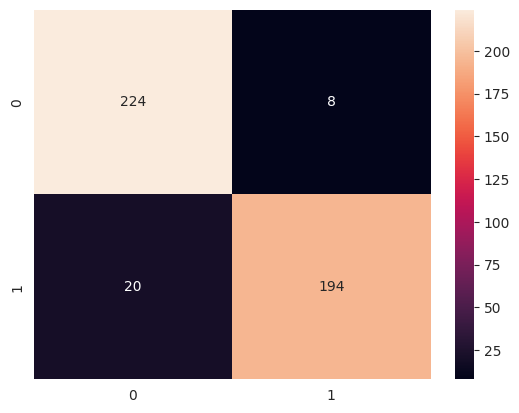

In [ ]:
rf = RandomForestClassifier(random_state=SEED, n_estimators=50)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Random Forest Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f} %")
print(f"Random Forest Recall Score: {recall_score(y_test,y_pred)*100:.2f} %")
print(f"Random Forest Precision Score: {precision_score(y_test,y_pred)*100:.2f} %")
print(f"Random Forest F1-Score: {f1_score(y_test,y_pred)*100:.2f} %")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='g')

#### Cross Validation

In [ ]:
skf = StratifiedKFold(shuffle=True, random_state=SEED)

cv_results = cross_validate(rf, X_resampled, y_resampled, cv=skf)
cv_results["test_score"]

mean = cv_results["test_score"].mean()
std = cv_results["test_score"].std()

print(f"Accuracy Score Confidence Interval = [{mean - 2*std}, {min(mean + 2*std, 1.0)}]")

Accuracy Score Confidence Interval = [0.9205847249772886, 0.9420806652580117]


## Selection Important Features for Analysis

### Random Forest Importances

In [ ]:
importance = pd.DataFrame({"columns": X_train.columns, "importance" : rf.feature_importances_})
rf_top_num = importance[importance["columns"].str.startswith("num")].sort_values(by="importance", ascending=False).head(10)
rf_top_cat = importance[importance["columns"].str.startswith("cat")].sort_values(by="importance", ascending=False).head(10)
top_num_list = rf_top_num["columns"].str.replace("num__","").to_list()
top_num_list

['JobSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'Age',
 'MonthlyIncome',
 'DailyRate',
 'DistanceFromHome',
 'Stagnation',
 'EnvironmentSatisfaction',
 'RelationshipSatisfaction']

In [ ]:
top_cat_list = rf_top_cat["columns"].str.replace("cat__","").to_list()
top_cat_list

['OverTime_No',
 'OverTime_Yes',
 'MaritalStatus_Single',
 'MaritalStatus_Married',
 'BusinessTravel_Travel_Frequently',
 'EducationField_Medical',
 'Gender_Male',
 'JobRole_Laboratory Technician',
 'Education_3',
 'Department_Research & Development']

### Exploratory Analysis Correlations

In [ ]:
pd.Series(corr_values[0:14], index=corr_index[0:14], name="Exploratory Correlations").abs().sort_values(ascending=False)

,Exploratory Correlations
num_TotalWorkingYears,0.171063
num_MonthlyIncome,0.159840
num_Age,0.159205
num_StockOptionLevel,0.137145
num_Stagnation,0.130324
num_JobInvolvement,0.130016
num_JobSatisfaction,0.103481
num_EnvironmentSatisfaction,0.103369
num_DistanceFromHome,0.077924
num_WorkLifeBalance_nt,0.063939


In [ ]:
pd.Series(corr_values[14:], index=corr_index[14:], name="Exploratory Correlations").abs().sort_values(ascending=False)

,Exploratory Correlations
cat_OverTime,0.242749
cat_JobRole,0.230701
cat_MaritalStatus,0.173386
cat_BusinessTravel,0.122880
cat_EducationField,0.086617
cat_Department,0.077375
cat_Gender,0.008897
cat_Education,0.000000


## Conlusion

The most important numerical features of this model are

- DistanceFromHome
- TotalWorkingYears
- MonthlyIncome
- StockOptionLevel
- JobSatisfaction

- Department
- OverTime
- JobRole
- BusinessTravel

Now, the next step is to evaluate these features combined to understand where are the problems and how to solve them. This analysis will be done using PowerBI